# Sobre o estudo de caso analisado

>**Dados:** O conjunto de dados disponibilizado contém informações sobre funcionários contratado e desligados de uma empresa
>
>**Objetivo:** Analisar os dados para identificar padrões e tendências que expliquem o aumento dos custos com desligamentos e novas contratações, buscando formas de reduzir esses custos.<br>
>
>**Motivação:** A empresa tem dificuldade em manter e desenvolver talentos, possui uma rotatividade grande de colaboradores que são contratados e em pouco tempo são desligados, provocando um custo alto com R&S e com processos demissionais.  

### Importando os pacotes que serão utilizado


In [1]:
# manipulação de dados e cálculos matemáticos
import pandas as pd
import numpy as np
# visualização de dados
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# criar análise exploratória rápida dos dados
from ydata_profiling import ProfileReport 

# para ignorar alertas
import warnings
warnings.filterwarnings('ignore')

### Leitura e carregamento dos dados

In [2]:
dados = r'C:\Users\manunes\personal-projects\analise-rh\dataset\Base_dados - Rotatividade RH.xlsx'
df = pd.read_excel(dados, engine='openpyxl')

Os dados de RH desta empresa foram disponibilizados em um arquivo Excel chamado `Base_dados - Rotatividade RH.xlsx`.

O conjunto de dados contém esses campos:

Variáveis            | Descrição
---------------------|--------------
`Data_Contratacao`     | Data exata em que o colaborador foi contratado pela empresa    
`Data_Desligamento`    | Data em que foi desligado, se estiver vazio é porque o colaborador ainda está ativo  
`Meses_de_Servico`     | Tempo total em meses que o colaborador trabalha ou trabalhou na empresa          
`Idade`                | Idade do colaborador no momento da contratação           
`Pontuacao_Desempenho` | Avaliação do desempenho em um intervalo de 1 a 5, onde 5 inidica uma entrega de excelência         
`Satisfacao_Trabalho`  | Indica o nível de satisfação com o trabalho entre 1 a 5, onde 5 significa muito satisfeito        
`Nivel_Cargo`          | Nível hierárquico do cargo ocupado          
`Salario`              | Salário bruto mensal do colaborador        
`Horas_Extras`         | Quantidade de horas extras que o colaborador possui         
`Desligamento`         | Indica o status do colaborador, onde 1 significa que foi desligado e 0 que o colaborador está ativo

## 1. Visão Geral sobre o Dataset

Tamanho do dataset

In [3]:
print('Tamanho do dataset:', df.shape[0], 'Linhas e', df.shape[1], 'Colunas')

Tamanho do dataset: 650 Linhas e 10 Colunas


Cabeçalho e rodapé do dataset

In [4]:
df

,Data_Contratacao,Data_Desligamento,Meses_de_Servico,Idade,Pontuacao_Desempenho,Satisfacao_Trabalho,Nivel_Cargo,Salario,Horas_Extras,Desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0
...,...,...,...,...,...,...,...,...,...,...
645,2021-08-28,NaT,33,31,2.260088,1.539328,Pleno,7940.88,6.847854,0
646,2022-02-24,NaT,27,23,4.611915,2.521799,Junior,4893.95,4.583937,0
647,2022-10-22,NaT,19,21,4.688376,4.641638,Junior,3838.70,11.306088,0
648,2021-09-27,NaT,32,32,3.551361,3.998147,Pleno,4739.81,4.343341,0


In [5]:
# Por praticidade, os nomes das variáveis serão convertidos em minúsculos
df.columns = df.columns.str.lower()

Tipos de dados

In [6]:
print('Tipos de dados das variáveis:')
df.dtypes

Tipos de dados das variáveis:


data_contratacao        datetime64[ns]
data_desligamento       datetime64[ns]
meses_de_servico                 int64
idade                            int64
pontuacao_desempenho           float64
satisfacao_trabalho            float64
nivel_cargo                     object
salario                        float64
horas_extras                   float64
desligamento                     int64
dtype: object

## 2. Entendendo os Tipos de Variáveis e Dados (Categorização)

<h3 style="color: orange;">Categorizando os Tipos de Variáveis e de Dados</h3> 

***
#### **Variáveis Numéricas**
<span style="color: gray;">**Dados Quantitativos:**</span>
- **meses_de_servico** - Discretos
- **idade** - Discretos
- **pontuacao_desempenho** - Contínuos
- **satisfacao_trabalho** - Contínuos
- **salario** - Contínuos
- **horas_extras** - Contínuos

<span style="color: gray;">**Dados Temporais:**</span>
- **data_contratacao** - Discretos
- **data_desligamento** - Discretos

<br> 

***

#### **Variáveis Categóricas**
<span style="color: gray;">**Dados Qualitativos:**</span>
- **nivel_cargo** - Ordinais
- **desligamento (status de desligamento)** - Binárias

## 3. Perguntas de Negócio

#### Após entender melhor os tipos de variáveis e os dados que temos sobre a empresa, algumas perguntas podem guiar essa análise para descobertas relevantes:

>1. Existe uma relação entre horas extras e satisfação no trabalho? (correlação entre a quantidade de horas extras e indicadores de desempenho)
>
>2. Qual é a média de permanência dos funcionários na empresa antes de pedir demissão? 
>
>3. Há uma correlação entre o tempo de serviço na empresa e a probabilidade de desligamento?
>
>4. Quais são os principais fatores que explicam os salários mais altos? Tempo de empresa, desempenho, nível de cargo ou quantidade de horas extras?
>
>5. Os funcionários com alto desempenho e salário baixo têm uma taxa de desligamento maior do que aqueles com o cenário oposto?
>
>6. Existe uma correlação entre a satisfação no trabalho e o desempenho?
>
>7. Qual é o tempo médio em que um funcionário júnior é desligado?
>
>8. A idade do colaborador ou o tempo de serviço influenciam mais o desempenho? (Existe uma tendência de que os mais jovens passem menos tempo na empresa?)

---
#### [KPI's do RH](https://www.gupy.io/blog/turnover)(link de uma fonte confiável para embasar nosso estudo)

* **Taxa de Desligamento(turnover)** 

* **Taxa geral de retenção:** avalia quantos funcionários permanecem na empresa durante um intervalo de tempo

* **Taxa geral de rotatividade:** oposto da taxa de retenção

* **Índice de retençâo dos melhores talentos:** avalia os funcionários com alto desempenho

Todas possuem fórmulas para calcularmos as taxas e como já são métricas de RH, podemos nos basear nelas para obter resultados mais do cotidiano de people analytics e que vão ajudar a análise.

---

#### Perguntas auxiliares

##### Qual o total de colaboradores contratados, desligados e ativos na empresa?

In [7]:
total_contratados = df['data_contratacao'].count()
total_desligados = df['data_desligamento'].count()

total_ativos = total_contratados - total_desligados

print('Total de funcionários:',
      '\nContratados:', total_contratados,
      '\nDesligados:', total_desligados,
      '\nEm atividade:', total_ativos)

Total de funcionários: 
Contratados: 650 
Desligados: 144 
Em atividade: 506


##### Qual a taxa de desligamento dessa empresa?

In [8]:
turnover = (((total_contratados + total_desligados) / 2) / total_ativos).round(4) * 100

print(f'A taxa de desligamento da empresa é de {turnover}%')

A taxa de desligamento da empresa é de 78.46%


##### Qual o período que temos de contratação com os dados disponíveis?

In [10]:
data_inicial = df['data_contratacao'].min().strftime('%d-%m-%Y')
data_final = df['data_contratacao'].max().strftime('%d-%m-%Y')

print(f'Data inicial: {data_inicial}',
      f'\nData final: {data_final}')

Data inicial: 29-06-2021 
Data final: 14-02-2024


Os dados tem um histórico de contratações de 2 anos, 7 meses e 16 dias considerando o intervalo de datas.


##### Qual o período de desligamentos?

In [11]:
data_inicial_2 = df['data_desligamento'].min().strftime('%d-%m-%Y')
data_final_2 = df['data_desligamento'].max().strftime('%d-%m-%Y')

print(f'Data inicial: {data_inicial_2}',
      f'\nData final: {data_final_2}')

Data inicial: 14-05-2024 
Data final: 14-05-2024


Inicialmente causa uma estranheza perceber que todos as demissões ocorreram no mesmo dia, que por sinal é o último dia do qual temos registro em todo a base disponível. Isso sugere que a empresa realizo uma demissão em massa, mas será necessário avaliar outros fatores para entender melhor essa informação.

## 4. Data Profiling | EDA inicial

Gerar o relatório de perfil de dados com ydata-profiling

In [ ]:
perfil_dos_dados = ProfileReport(df, title='Report RH', explorative=True)

perfil_dos_dados.to_notebook_iframe()

## 5. Limpeza e Tratamento dos Dados

#### I - Dados duplicados

In [12]:
df.nunique()

data_contratacao         33
data_desligamento         1
meses_de_servico         33
idade                    32
pontuacao_desempenho    650
satisfacao_trabalho     650
nivel_cargo               3
salario                 650
horas_extras            540
desligamento              2
dtype: int64

Avaliando aqueles que fazem sentido existirem ou não:

´data_desligamento´: Parece estranho temos uma proposta baseada em muitas demissões e todas elas apontarem para apenas um único registro, ou seja, um único dia em que houve demissões. Vamos trazer um detalhamento sobre isso na análise univariada desta variável;

´salario´: Temos um salário diferente para cada funcionário, considerando que o total de contratados é de 650. Isso indica algo preocupante, que é a empresa não ter um padrão de salários entre seus colaboradores, o que pode ter uma influência no nível de satisfação deles. Diferenças salarias são comentadas entre os próprios colaboradores e costumam causar uma má repercurssão;

´nivel_cargo´: Aqui há um indicativo que reforça o quão delicada é a situação de não ter uma padrão nos salários por cargo, visto que só temos 3 níveis de cargo possíveis e 650 salários diferentes distribuídos entre 650 funcionários. Na análise bivariada é interessante observar o comportamento de oscilação de salário em função do nível de cargo ou do tempo de serviço.

#### II - Dados Ausentes

In [13]:
nulos = df.isnull().sum()
nulos

data_contratacao          0
data_desligamento       506
meses_de_servico          0
idade                     0
pontuacao_desempenho      0
satisfacao_trabalho       0
nivel_cargo               0
salario                   0
horas_extras              0
desligamento              0
dtype: int64

In [14]:
print(f'Temos {nulos.sum()} valores ausentes no conjunto de dados.')

Temos 506 valores ausentes no conjunto de dados.


Calculando a porcentagem de valores ausentes em cada variável

In [15]:
porcentagem_nulos = (nulos / len(df) * 100).round(2).sort_values(ascending=False)

print('Variável              | nulos (%)')
porcentagem_nulos

Variável              | nulos (%)


data_desligamento       77.85
data_contratacao         0.00
meses_de_servico         0.00
idade                    0.00
pontuacao_desempenho     0.00
satisfacao_trabalho      0.00
nivel_cargo              0.00
salario                  0.00
horas_extras             0.00
desligamento             0.00
dtype: float64

Definir qual abordagem aplicar com os dados ausentes:
* Inferir a partir de outras medidas (média, mediana, máximo, mínimo...)
* Ignorar
* Deletar

## 6. Análise Exploratória dos Dados | EDA Detalhada

### Agrupando as variáveis por cada tipo

#### Variáveis Numéricas

In [16]:
# Variáveis Qualitativas
qualitativas = df[['nivel_cargo', 'desligamento']]
qualitativas.head(3)

,nivel_cargo,desligamento
0,Pleno,0
1,Sênior,1
2,Sênior,0


#### Variáveis Temporais

In [17]:
# Variáveis Quantitativas Temporais
temporais = df[['data_contratacao', 'data_desligamento']]
temporais.head(3)

,data_contratacao,data_desligamento
0,2024-02-14,NaT
1,2023-11-16,2024-05-14
2,2023-11-16,NaT


#### Variáveis Categóricas

In [18]:
# Variáveis Quantitativas
variaveis_a_desconsiderar = pd.concat([qualitativas, temporais])
quantitativas = df.loc[:, ~df.columns.isin(variaveis_a_desconsiderar)]

quantitativas.head(3)

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras
0,3,24,2.066788,2.043644,4994.41,15.465241
1,6,43,3.256257,1.711719,8798.34,19.036627
2,6,45,4.827732,3.480214,8891.02,13.326408


### Análise Univariada

#### Dados Quantitativos

In [19]:
quantitativas.describe().round(2)

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras
count,650.00,650.00,650.00,650.00,650.00,650.00
mean,18.69,28.35,3.03,2.94,6131.59,10.10
std,9.65,8.01,1.17,1.15,2689.08,6.24
min,3.00,18.00,1.00,1.00,2004.50,0.00
25%,10.00,22.00,1.99,1.97,4023.75,4.98
50%,19.00,27.00,3.06,2.92,5562.95,9.41
75%,27.00,33.00,4.02,3.96,7814.48,14.75
max,35.00,49.00,4.99,5.00,11957.29,41.64


#### Dados Qualitativos

In [20]:
def tabela_frequencia(df, variavel):
    """
    Calcula a frequência e a porcentagem de uma variável categórica em um DataFrame.

    Parâmetros:
    - df: DataFrame: DataFrame contendo os dados.
    - variavel: str: Nome da variável categórica a ser analisada.

    Retorna:
    - DataFrame: DataFrame com a frequência e porcentagem da variável categórica.
    """
    frequencia = df[variavel].value_counts()
    porcentagem = (frequencia / len(df) * 100).round(2)

    tabela = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})

    # Renomear o índice da coluna
    tabela.index.name = 'Categorias' 
    tabela = tabela.reset_index()
    
    return tabela

In [21]:
cargo = tabela_frequencia(qualitativas, 'nivel_cargo')
cargo

,Categorias,Frequência,Porcentagem (%)
0,Junior,233,35.85
1,Pleno,225,34.62
2,Sênior,192,29.54


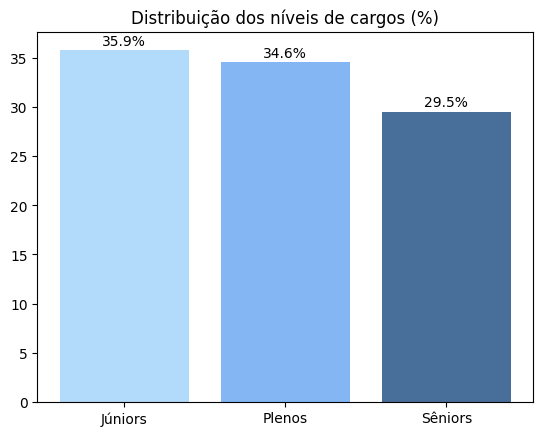

In [46]:
tamanhos = [35.85, 34.62, 29.54]
niveis = ['Júniors', 'Plenos', 'Sêniors']

plt.title('Distribuição dos níveis de cargos (%)')

plt.bar(niveis, tamanhos, color=['#B2DAFA','#84b6f4', '#486f99'])

# Adicionando as porcentagens acima das barras
for i, tamanho in enumerate(tamanhos):
    plt.text(i, tamanho + 0.5, f'{tamanho:.1f}%', ha='center')

plt.show()

In [23]:
# Renomeando os valores da variável binária
qualitativas['desligamento'] = qualitativas['desligamento'].replace({0: 'Ativo', 1: 'Desligado'})

status = tabela_frequencia(qualitativas, 'desligamento')
status

,Categorias,Frequência,Porcentagem (%)
0,Ativo,506,77.85
1,Desligado,144,22.15


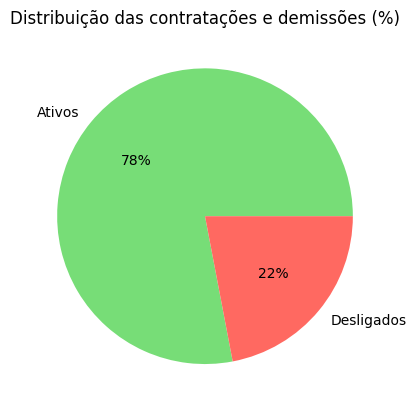

In [24]:
tamanhos = [78, 22]
rotulos = ['Ativos', 'Desligados']

plt.title('Distribuição das contratações e demissões (%)')
plt.pie(tamanhos, labels=rotulos, autopct='%1.0f%%', colors=['#77DD77','#FF6961'])
plt.show()

### Análise Bivariada

#### Correlação entre as variáveis

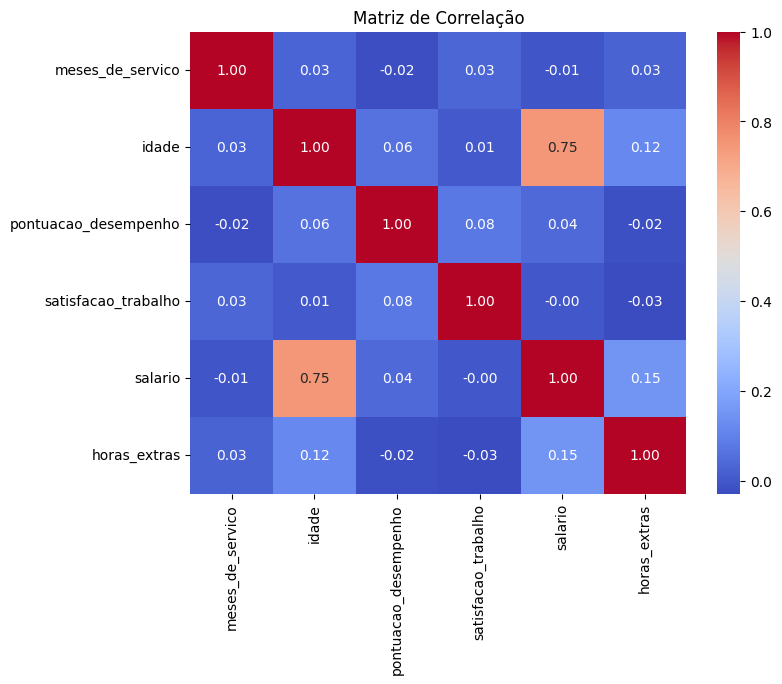

In [25]:
correlacao = quantitativas.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')  
plt.show()

### Análise Multivariada

Boxplot das variáveis

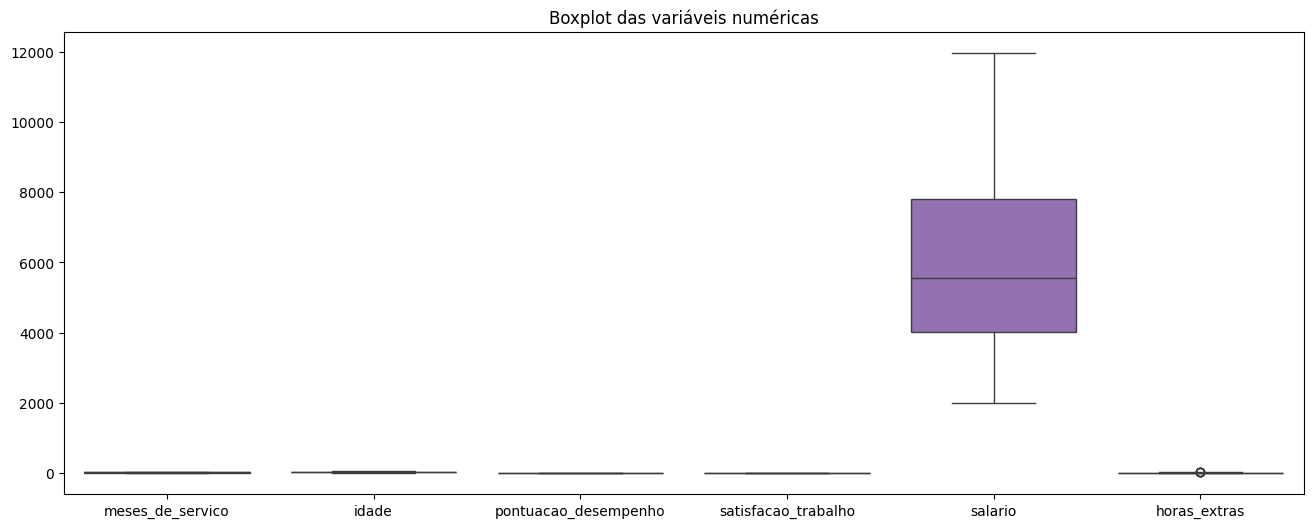

In [26]:
plt.figure(figsize=(16, 6))

sns.boxplot(data=quantitativas)
plt.title('Boxplot das variáveis numéricas')
plt.show()

In [27]:
# essa opção é a principal que utilizei, mas gráficos interativos não são exibidos quando olhamos pelo github então a versão acima é de um gráfico estático só para representação formal
boxplot = px.box(quantitativas, title='Boxplot das Variáveis Numéricas')
boxplot.show()

In [28]:
boxplot_temporais = px.box(temporais, title='Boxplot das contratações e demissões')
boxplot_temporais.show()

### Análise de Séries Temporais

Média de contratações e desligamentos

In [30]:
# Criação de uma série temporal para contratações e desligamentos
contratacoes = temporais['data_contratacao'].value_counts().resample('M').sum()
desligamentos = temporais['data_desligamento'].value_counts().resample('M').sum()

In [31]:
media_contratacoes = contratacoes.mean().round(2)   
media_desligamentos = desligamentos.mean().round(2)

print(f'A média de contratações é de {media_contratacoes} e de desligamentos é de {media_desligamentos}')

A média de contratações é de 19.7 e de desligamentos é de 144.0


Plotando o gráfico de contratações e desligamento

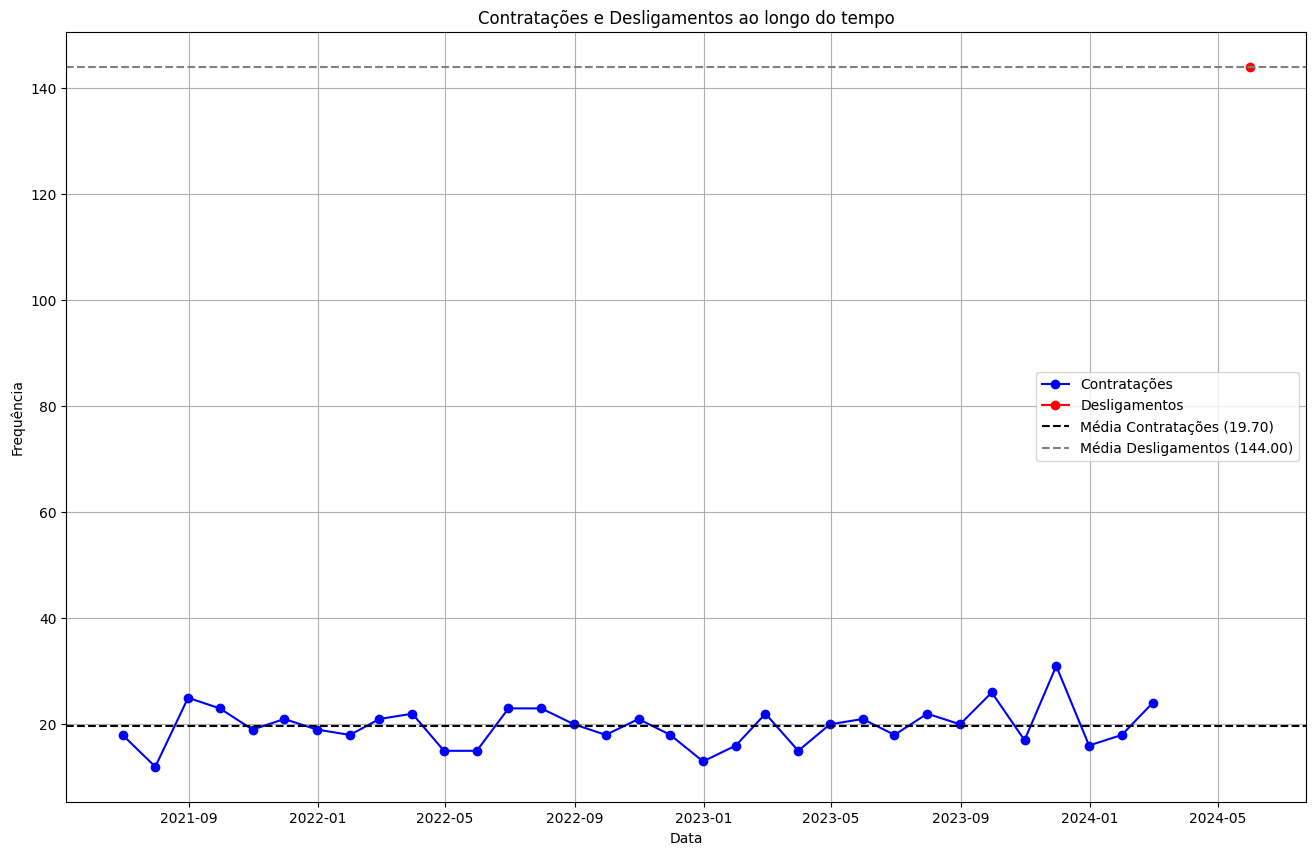

In [32]:
plt.figure(figsize=(16,10))

plt.plot(contratacoes.index, contratacoes.values, label='Contratações', color='blue', marker='o') # Plotar contratações
plt.plot(desligamentos.index, desligamentos.values, label='Desligamentos', color='red', marker='o') # Plotar desligamentos

# Adicionar linha da média
plt.axhline(y=media_contratacoes, color='black', linestyle='--', label=f'Média Contratações ({media_contratacoes:.2f})')
plt.axhline(y=media_desligamentos, color='gray', linestyle='--', label=f'Média Desligamentos ({media_desligamentos:.2f})')

plt.title('Contratações e Desligamentos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)

plt.show()